In [1]:
import pandas
import sys
import os
import seaborn
from matplotlib import pyplot

In [2]:
mouselimb = pandas.read_csv('190425MouseLimb10XMeta.csv', index_col=0, dtype={'ident': str})

In [3]:
mouselimb.head()

,nGene,ident
limb12_13_0AAACCTGAGATCGATA_1,3404,3
limb12_13_0AAACCTGAGATGAGAG_1,2322,2
limb12_13_0AAACCTGAGCAGATCG_1,2162,5
limb12_13_0AAACCTGAGCGATCCC_1,3771,6
limb12_13_0AAACCTGAGTGTACCT_1,2517,1


In [4]:
MouseDict={
    '0':'Mesenchymal cell 1 ',
    '1':'Perichondrial cell ',
    '2':'Mesenchymal cell 2 ',
    '3':'Chondrocyte ',
    '4':'Myoblast ',
    '5':'Epithelial cell 1 ',
    '6':'Fibroblast ',
    '7':'Pax3+ muscle precursor ',
    '8':'Macrophage ',
    '9':'Endothelial cell ',
    '10':'Foxp1+ perichondrial cell ',
    '11':'Tenocyte ',
    '12':'Myocyte 2 ',
    '13':'Early erythrocyte ',
    '14':'Neural crest cell ',
    '15':'Stressed mesenchymal cell ',
    '16':'Osteoblast ',
    '17':'Myocyte 1 ',
    '18':'Epithelial cell 2 ',
    '19':'Smooth muscle cell ',
    '20':'EMP ',
    '21':'Megakaryocyte ',
    '22':'Col1a1+ myocyte 2 ',
    '23':'Late erythrocyte ',
    '24':'Ihh+ chondrocyte '
}

MouseColorDict = {
    '0':'#575757',
    '1':'#0118FA',
    '2':'#C2BDC0',
    '3':'#00FFFF',
    '4':'#FF8380',
    '5':'#8B8A1D',
    '6':'#CAC379',
    '7':'#00FF00',
    '8':'#FFFA2C',
    '9':'#C39CFB',
    '10':'#7762F0',
    '11':'#717E8D',
    '12':'#871F4E',
    '13':'#35B5E2',
    '14':'#9834E7',
    '15':'#995432',
    '16':'#483F84',
    '17':'#ff0000',
    '18':'#216407',
    '19':'#ff42ef',
    '20':'#FBC83C',
    '21':'#FF9A21',
    '22':'#B4246E',
    '23':'#09658A',
    '24':'#016edb'}

In [5]:
mouselimb['color'] = mouselimb['ident'].apply(lambda x: MouseColorDict[x])
mouselimb['cluster_name'] = mouselimb['ident'].apply(lambda x: MouseDict[x])

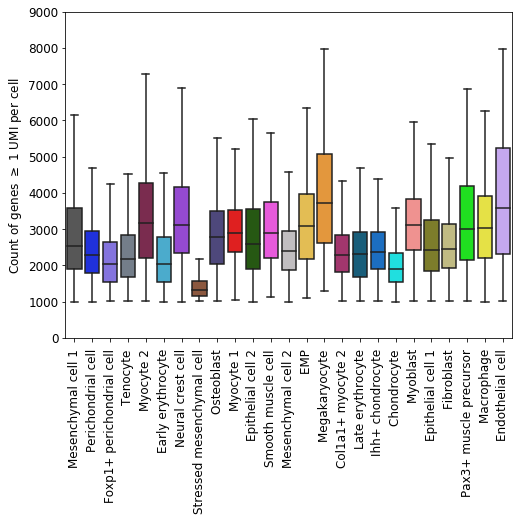

In [6]:
def plot_boxplot(expressed):
    font_size = 12.0
    f = pyplot.figure(figsize=(8,6))
    ax = f.add_subplot(1,1,1)
    _ = seaborn.boxplot(x='ident', y='nGene', palette=MouseColorDict, data=expressed, ax=ax, fliersize=0)
    #_ = ax.set_ylabel('Count of genes $\geq$ 1 FPKM per cell', size=font_size)
    _ = ax.set_ylabel('Count of genes $\geq$ 1 UMI per cell', size=font_size)
    _ = ax.set_xlabel('')
    
    labels = ax.get_yticklabels()
    for l in labels:
        l.set_fontsize(font_size)

    labels = ax.get_xticklabels()
    for l in labels:
        l.set_text(MouseDict[l.get_text()])
        l.set_fontsize(font_size)    
    _ = ax.set_xticklabels(labels, rotation=90, ha='center')
    _ = ax.set_ylim(0, 9000)
    return f, ax
f, ax = plot_boxplot(mouselimb)